In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

# lecture à partir de Github pour pouvoir éxécuter le notebook sans se soucier d'importer le fichier csv
url = 'https://raw.githubusercontent.com/moncoachdata/DATA_DEEP_LEARNING/master/kc_house_data.csv'
df = pd.read_csv(url)

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


#### Indication des columns

id - ID unique pour chaque maison vendue
date - Date de la vente de la maison
price - Prix de chaque maison vendue
bedrooms - Nombre de chambres
bathrooms - Nombre de salles de bains, où 0,5 correspond à une chambre avec toilettes mais sans douche
sqft_living - Superficie habitable
sqft_lot - Superficie du terrain
floors - Nombre d'étages
waterfront - Une variable dummy (fictive) indiquant si l'appartement donnait sur le front de mer ou non
view - Un indice de 0 à 4 de la qualité de la vue de la propriété
condition - Un indice de 1 à 5 sur l'état de l'appartement
grade - Un indice de 1 à 13, où 1-3 a un niveau de qualité faible de construction et de conception des bâtiments, 7 a un niveau moyen de construction et de conception, et 11-13 a un niveau de qualité élevé de construction et de conception
sqft_above - La superficie de l'espace intérieur du logement qui est au-dessus du niveau du sol
sqft_basement - La superficie de l'espace intérieur du logement qui se trouve sous le niveau du sol
yr_built - L'année où la maison a été initialement construite
yr_renovated - L'année de la dernière rénovation de la maison
zipcode - Dans quelle zone de code postal se trouve la maison
lat - Latitude
long - Longitude
sqft_living15 - La superficie de l'espace intérieur de l'habitation pour les 15 voisins les plus proches
sqft_lot15 - La superficie du terrains des 15 voisins les plus proches

In [2]:
#no nan
df.isnull().sum()

#discribe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


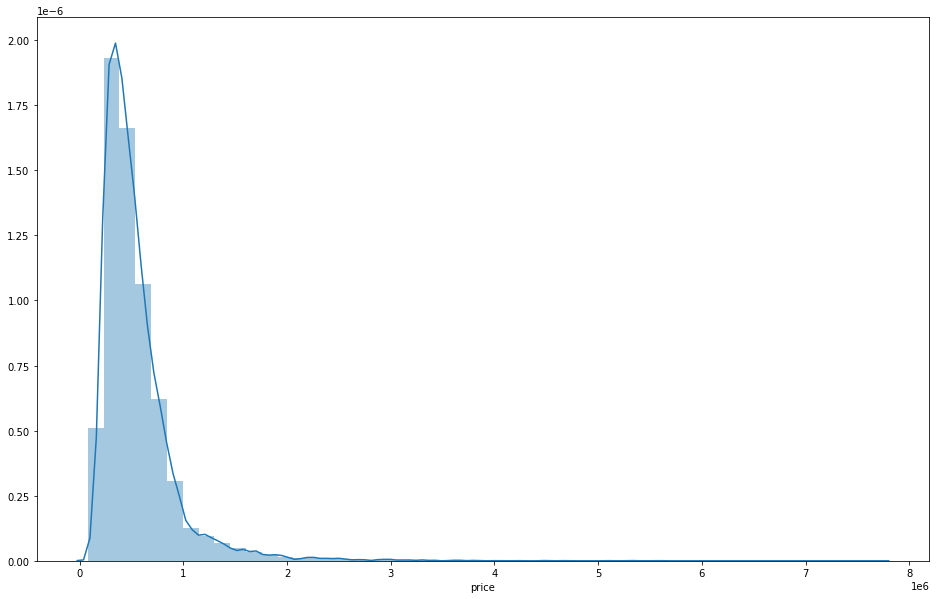

In [7]:
#distribution des prix

plt.figure ( figsize = (16,10))
sns.distplot ( df.price ) ;

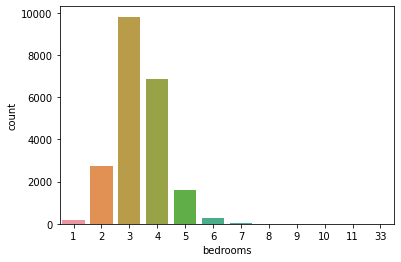

In [10]:
# distrubition pour une caracteristique numerique categorielle
sns.countplot (df.bedrooms) ;

In [15]:
# rechercher les feat correles
df.corr() ['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='sqft_living'>

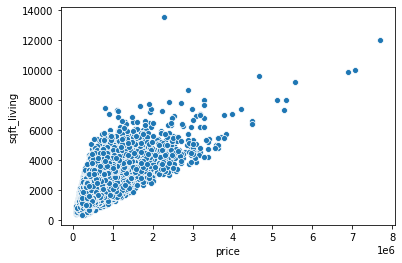

In [3]:
#etude et analyse
sns.scatterplot (  'price' , 'sqft_living' , data = df  )

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

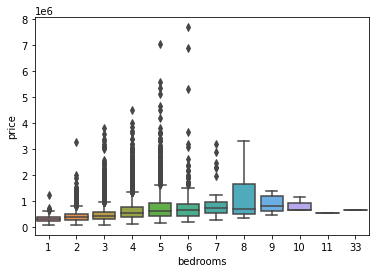

In [4]:
sns.boxplot ('bedrooms' , 'price' , data = df )

<AxesSubplot:xlabel='price', ylabel='long'>

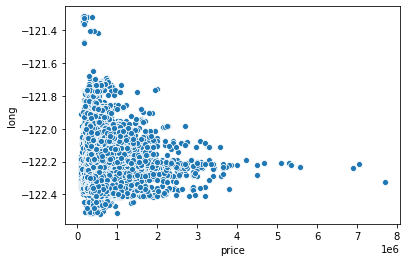

In [19]:
sns.scatterplot ('price' , 'long' , data = df )

<AxesSubplot:xlabel='price', ylabel='lat'>

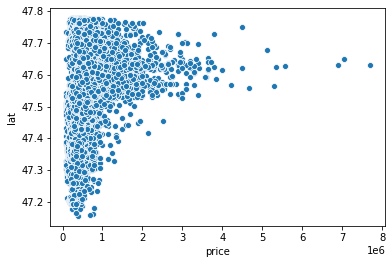

In [20]:
sns.scatterplot ('price' , 'lat' , data = df )

In [24]:
df.price

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21592    360000.0
21593    400000.0
21594    402101.0
21595    400000.0
21596    325000.0
Name: price, Length: 21597, dtype: float64

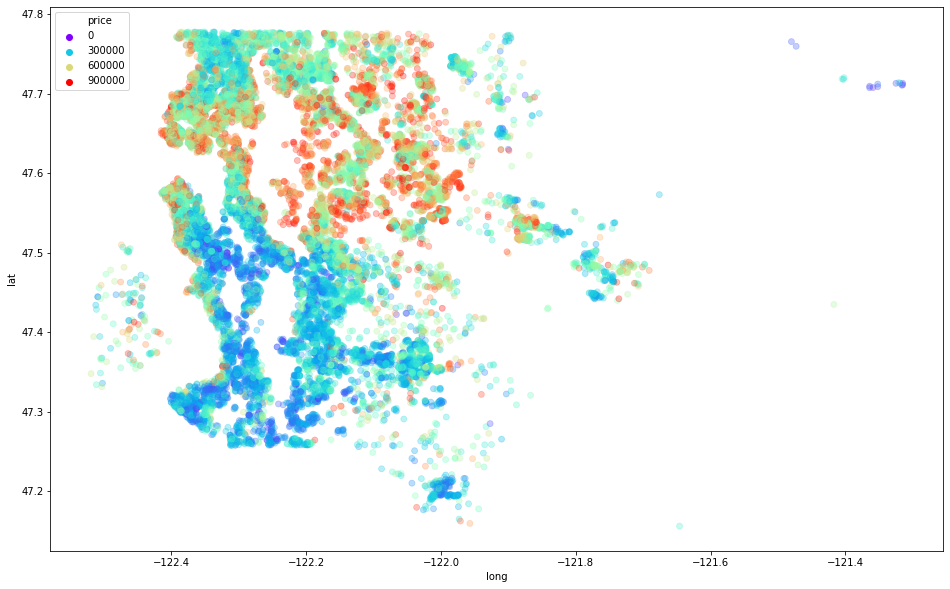

In [11]:
plt.figure (figsize = (16,10))
sns.scatterplot ('long' , 'lat' , 
                 data = df[df.price < 850000.0] , 
                 hue = df[df.price < 850000.0].price , 
                 edgecolor = None , 
                 alpha = 0.3 ,
                 palette = 'rainbow') ;

In [13]:
# 45 . regression (Feature enginering)

# permet de se debarasser des feature inutiles ou d en creer de nouvelle

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [16]:
df.corr() ['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

In [20]:
# col id inutile : 
df = df.drop ('id' , axis = 1)
df.head(2)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639


In [25]:
print (df.date.dtypes)

# la colonne date est de type objet, il faut faire une 
# convertion en format datetime :

df.date = pd.to_datetime (df.date)
print (df.date.dtypes)


datetime64[ns]
datetime64[ns]


In [35]:
#creation de colonne 
df ['year'] = df.date.apply (lambda x : x.year)
df['month'] = df.date.apply (lambda x : x.month)

In [36]:
df.head(2)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12


<AxesSubplot:xlabel='month', ylabel='price'>

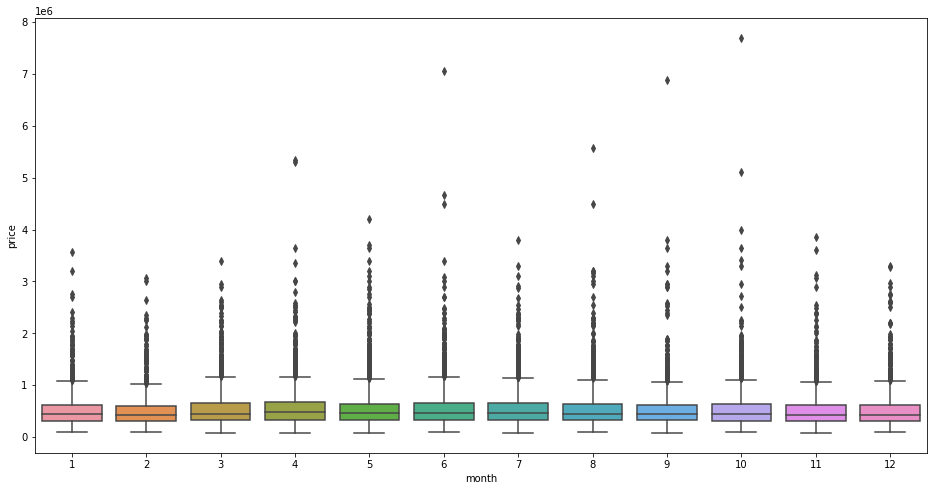

In [41]:
#analyse des vente par mois 
plt.figure ( figsize = (16,8) )
sns.boxplot ('month', 'price' , data = df)

<AxesSubplot:xlabel='month'>

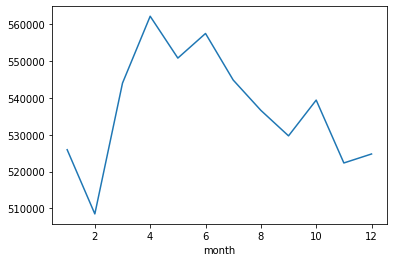

In [43]:
df.groupby('month').mean() ['price'].plot()

#il se degage une tendance mais elle est faible

<AxesSubplot:xlabel='year'>

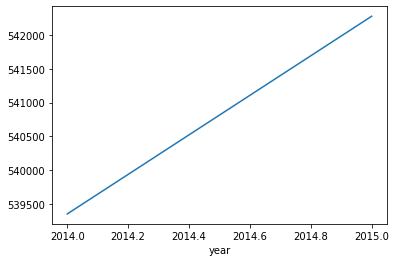

In [44]:
df.groupby('year').mean() ['price'].plot()


In [46]:
# ok la col date ne nous est plus utile nous allons la supprimer 

df.drop ('date', axis = 1 , inplace = True)

In [47]:
# analysons d autres colonnes 
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month'],
      dtype='object')

In [48]:
df.head()

# le zipcode est une val num categorielle elle peut embrouillé notre modele
# nous allons etudier cela

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [51]:
df.zipcode.value_counts ()
#il y a 70 zip code unique
# nous pouvons chercher qq zone est dans le sud le nord l ouest , ...
#mais cela prend du temps
# le getdummies cree bcp trpo de col et cela semble porreux 
#dans la suite nous allons les ignorer, c est un choix 
df.drop ('zipcode', axis = 1 , inplace = True)

In [52]:
df.head()

# yr_renovated est assez bizarre 
# nous allons etudier cela 

# sqft_basement est assez bizarre 
# nous allons etudier cela 

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2


In [67]:
# 46 . Keras (set de train de test)

X = df.drop('price', axis = 1).values
y = df.price.values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, 
                                                    y, 
                                                    test_size=0.30, 
                                                    random_state=101)

In [68]:
#normalisation

from sklearn.preprocessing import MinMaxScaler

# instance
scaler = MinMaxScaler()

#adapte au données 
scaler.fit (X_train)

#normalise
X_train = scaler.transform (X_train)

# en une etape on peut normaliser le fit et le transform
# X_train = scaler.fit_transform (X_train)

X_test = scaler.transform (X_test)

In [69]:
X_train.shape

(15117, 19)

In [90]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#instance model
model = Sequential ()

#creation des couches 
c1 = Dense (19 , 
           activation = 'relu')

c2 = Dense (19 , 
           activation = 'relu')

c3 = Dense (19 , 
           activation = 'relu')

c_out = Dense (1 , 
           activation = 'relu')

#ajout des couches
model.add (c1)
model.add (c2)
model.add (c3)
model.add (c_out)

#compileat

model.compile ( optimizer='adam',
                loss= 'mse', )

model.fit ( X_train ,
            y_train ,
            validation_data = (X_test ,y_test),
            batch_size = 128  , 
            epochs = 400)



Epoch 1/400
119/119 [==============================] - 0s 2ms/step - loss: 430245773312.0000 - val_loss: 418953363456.0000
Epoch 2/400
119/119 [==============================] - 0s 1ms/step - loss: 429929725952.0000 - val_loss: 418045591552.0000
Epoch 3/400
119/119 [==============================] - 0s 1ms/step - loss: 427403051008.0000 - val_loss: 413189636096.0000
Epoch 4/400
119/119 [==============================] - 0s 1ms/step - loss: 418463154176.0000 - val_loss: 399314190336.0000
Epoch 5/400
119/119 [==============================] - 0s 1ms/step - loss: 397612384256.0000 - val_loss: 371063193600.0000
Epoch 6/400
119/119 [==============================] - 0s 1ms/step - loss: 360343961600.0000 - val_loss: 325385584640.0000
Epoch 7/400
119/119 [==============================] - 0s 1ms/step - loss: 306070355968.0000 - val_loss: 264894414848.0000
Epoch 8/400
119/119 [==============================] - 0s 1ms/step - loss: 241134993408.0000 - val_loss: 199989641216.0000
Epoch 9/400
119/

119/119 [==============================] - 0s 1ms/step - loss: 48573145088.0000 - val_loss: 47272763392.0000
Epoch 69/400
119/119 [==============================] - 0s 1ms/step - loss: 48362303488.0000 - val_loss: 47047991296.0000
Epoch 70/400
119/119 [==============================] - 0s 1ms/step - loss: 48118468608.0000 - val_loss: 46882598912.0000
Epoch 71/400
119/119 [==============================] - 0s 1ms/step - loss: 47874703360.0000 - val_loss: 46636068864.0000
Epoch 72/400
119/119 [==============================] - 0s 1ms/step - loss: 47669440512.0000 - val_loss: 46431178752.0000
Epoch 73/400
119/119 [==============================] - 0s 1ms/step - loss: 47456579584.0000 - val_loss: 46244978688.0000
Epoch 74/400
119/119 [==============================] - 0s 1ms/step - loss: 47261163520.0000 - val_loss: 46065860608.0000
Epoch 75/400
119/119 [==============================] - 0s 1ms/step - loss: 47086608384.0000 - val_loss: 45891854336.0000
Epoch 76/400
119/119 [===============

Epoch 135/400
119/119 [==============================] - 0s 1ms/step - loss: 39199195136.0000 - val_loss: 38132109312.0000
Epoch 136/400
119/119 [==============================] - 0s 1ms/step - loss: 39091470336.0000 - val_loss: 38056108032.0000
Epoch 137/400
119/119 [==============================] - 0s 1ms/step - loss: 38999416832.0000 - val_loss: 37914013696.0000
Epoch 138/400
119/119 [==============================] - 0s 1ms/step - loss: 38887686144.0000 - val_loss: 37808283648.0000
Epoch 139/400
119/119 [==============================] - 0s 1ms/step - loss: 38787117056.0000 - val_loss: 37703499776.0000
Epoch 140/400
119/119 [==============================] - 0s 1ms/step - loss: 38699237376.0000 - val_loss: 37609115648.0000
Epoch 141/400
119/119 [==============================] - 0s 1ms/step - loss: 38593880064.0000 - val_loss: 37502722048.0000
Epoch 142/400
119/119 [==============================] - 0s 1ms/step - loss: 38507556864.0000 - val_loss: 37407416320.0000
Epoch 143/400
11

119/119 [==============================] - 0s 1ms/step - loss: 35183546368.0000 - val_loss: 33974065152.0000
Epoch 202/400
119/119 [==============================] - 0s 1ms/step - loss: 35152740352.0000 - val_loss: 33933268992.0000
Epoch 203/400
119/119 [==============================] - 0s 1ms/step - loss: 35118252032.0000 - val_loss: 33899816960.0000
Epoch 204/400
119/119 [==============================] - 0s 1ms/step - loss: 35074203648.0000 - val_loss: 33880184832.0000
Epoch 205/400
119/119 [==============================] - 0s 1ms/step - loss: 35044777984.0000 - val_loss: 33840650240.0000
Epoch 206/400
119/119 [==============================] - 0s 1ms/step - loss: 35021991936.0000 - val_loss: 33811402752.0000
Epoch 207/400
119/119 [==============================] - 0s 1ms/step - loss: 34983141376.0000 - val_loss: 33780082688.0000
Epoch 208/400
119/119 [==============================] - 0s 1ms/step - loss: 34950574080.0000 - val_loss: 33750534144.0000
Epoch 209/400
119/119 [=======

119/119 [==============================] - 0s 1ms/step - loss: 33454985216.0000 - val_loss: 32195313664.0000
Epoch 268/400
119/119 [==============================] - 0s 1ms/step - loss: 33433348096.0000 - val_loss: 32165128192.0000
Epoch 269/400
119/119 [==============================] - 0s 1ms/step - loss: 33413320704.0000 - val_loss: 32137029632.0000
Epoch 270/400
119/119 [==============================] - 0s 1ms/step - loss: 33391499264.0000 - val_loss: 32133974016.0000
Epoch 271/400
119/119 [==============================] - 0s 1ms/step - loss: 33373704192.0000 - val_loss: 32103448576.0000
Epoch 272/400
119/119 [==============================] - 0s 1ms/step - loss: 33363773440.0000 - val_loss: 32086427648.0000
Epoch 273/400
119/119 [==============================] - 0s 1ms/step - loss: 33357819904.0000 - val_loss: 32073496576.0000
Epoch 274/400
119/119 [==============================] - 0s 1ms/step - loss: 33328672768.0000 - val_loss: 32041709568.0000
Epoch 275/400
119/119 [=======

119/119 [==============================] - 0s 1ms/step - loss: 32461613056.0000 - val_loss: 31058716672.0000
Epoch 334/400
119/119 [==============================] - 0s 1ms/step - loss: 32436031488.0000 - val_loss: 31009198080.0000
Epoch 335/400
119/119 [==============================] - 0s 1ms/step - loss: 32434565120.0000 - val_loss: 31025217536.0000
Epoch 336/400
119/119 [==============================] - 0s 1ms/step - loss: 32430657536.0000 - val_loss: 30987048960.0000
Epoch 337/400
119/119 [==============================] - 0s 1ms/step - loss: 32408233984.0000 - val_loss: 30977759232.0000
Epoch 338/400
119/119 [==============================] - 0s 1ms/step - loss: 32391565312.0000 - val_loss: 30968016896.0000
Epoch 339/400
119/119 [==============================] - 0s 1ms/step - loss: 32382943232.0000 - val_loss: 30965401600.0000
Epoch 340/400
119/119 [==============================] - 0s 1ms/step - loss: 32369084416.0000 - val_loss: 30919129088.0000
Epoch 341/400
119/119 [=======

119/119 [==============================] - 0s 1ms/step - loss: 31761324032.0000 - val_loss: 30216626176.0000
Epoch 400/400
119/119 [==============================] - 0s 1ms/step - loss: 31774687232.0000 - val_loss: 30217893888.0000


<AxesSubplot:>

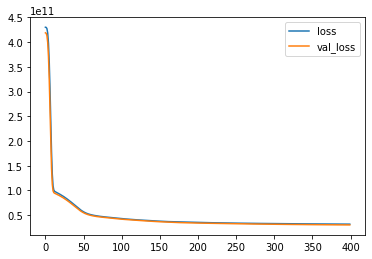

In [91]:
# 47 evaluation keras

pd.DataFrame( model.history.history ).plot()

#val loss est l ensemble de test et cela  
# permet de verifier graphiquement pour l overfitting ou sous apprentissage



In [116]:
#nous allons maintenant évaluer le modele

from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

pred = model.predict (X_test)

s_pred = pd.Series (pred.reshape (6480,))
s_target =  pd.Series (y_test)

loss_df = pd.concat ( [ s_pred , s_target ] ,
                      axis = 1   )

loss_df.rename (columns = { 0 : 'pred', 1 : 'real'} , inplace = True)

print ('root_mean_squared_error',np.sqrt(mean_squared_error ( loss_df.pred , loss_df.real )))
print ('mean_absolute_error',mean_absolute_error ( loss_df.pred , loss_df.real ))
print ('mean de price',df.price.describe() ['mean'])
107 * 100 / 540



root_mean_squared_error 173832.9487114209
mean_absolute_error 107085.08871635154
mean de price 540296.5735055795


19.814814814814813

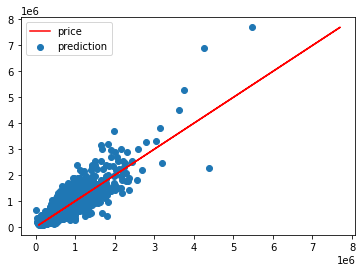

In [126]:
explained_variance_score ( loss_df.pred , loss_df.real )
# c est pas mal comme resultat 0.70

# le model n etait pas en surapprentissage donc 
# on peut recommencer avec plus d epochs

# on peut aussi analyser a l aide d un graphe 
plt.scatter (  s_pred , s_target , label = 'prediction'  )
#idealement c est une ligne droite 
plt.plot (  s_target , s_target , 'r', label = 'price'  )
plt.legend()

#conclusion : 
# on voit ici que les maisons tres cheres sont mal predites
# hypothese ces maisons punissent le modele nous sommes mauvais pour predire 
# les maisons super cheres nous allons reentrainer le modele sans ces maisons
#notre modele est pas mal pour les predictions des maisons jusqu a m de dollars

In [134]:
#nous allons reentrainer le modele avec des données plus appropriés 

single_house = df.drop('price' , axis = 1).iloc[0]
print (single_house.values)
print (single_house.values.reshape (-1 , 19))
single_house = scaler.transform (single_house.values.reshape (-1 , 19))

[ 3.00000e+00  1.00000e+00  1.18000e+03  5.65000e+03  1.00000e+00
  0.00000e+00  0.00000e+00  3.00000e+00  7.00000e+00  1.18000e+03
  0.00000e+00  1.95500e+03  0.00000e+00  4.75112e+01 -1.22257e+02
  1.34000e+03  5.65000e+03  2.01400e+03  1.00000e+01]
[[ 3.00000e+00  1.00000e+00  1.18000e+03  5.65000e+03  1.00000e+00
   0.00000e+00  0.00000e+00  3.00000e+00  7.00000e+00  1.18000e+03
   0.00000e+00  1.95500e+03  0.00000e+00  4.75112e+01 -1.22257e+02
   1.34000e+03  5.65000e+03  2.01400e+03  1.00000e+01]]


In [135]:
print ( model.predict (single_house))
df.iloc[0] ['price']


[[291967.34]]


221900.0

In [161]:
#ici pour la suite nous allons retraiter les features puis rentrainer le model

df.shape  #(21597, 20)

df.sort_values ('price' , ascending = False)

df [ df.price < 3000000.0 ].shape

#nous prenons les observations avec un prix inferieur a 3M de dolls
df_new = df [ df.price < 3000000.0 ]

In [196]:
corr_price = df_new.corr()['price'].sort_values()
corr_price = corr_price [corr_price >0.5].index

In [197]:
#set target et feature
X = df_new [corr_price]
y = df_new.price

#set de test et de train 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42)

In [198]:
#normalisation 
from sklearn.preprocessing import MinMaxScaler 

#instance
scaler = MinMaxScaler ()

# entrainerment et transform
X_train = scaler.fit_transform (X_train)

# transform le test
X_test = scaler.transform (X_test)

In [152]:
X_train.shape

(15082, 19)

In [199]:
#creation d un film

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential ()

model.add (Dense (19, activation='relu') )   
model.add (Dense (19, activation='relu') )   
model.add (Dense (19, activation='relu') )   
model.add (Dense (19, activation='relu') )   
model.add (Dense (1 , activation='relu') )   

model.compile ( 'Adam', loss = 'mse')

model.fit (x=X_train,
    y=y_train,
    epochs=600,
    validation_data= (X_test , y_test) )


Epoch 1/600
472/472 [==============================] - 1s 1ms/step - loss: 381397762048.0000 - val_loss: 327800848384.0000
Epoch 2/600
472/472 [==============================] - 1s 1ms/step - loss: 142178992128.0000 - val_loss: 58061942784.0000
Epoch 3/600
472/472 [==============================] - 1s 1ms/step - loss: 55494942720.0000 - val_loss: 54284337152.0000
Epoch 4/600
472/472 [==============================] - 1s 1ms/step - loss: 51592175616.0000 - val_loss: 50252406784.0000
Epoch 5/600
472/472 [==============================] - 1s 1ms/step - loss: 47436345344.0000 - val_loss: 45941215232.0000
Epoch 6/600
472/472 [==============================] - 1s 1ms/step - loss: 42999398400.0000 - val_loss: 41276186624.0000
Epoch 7/600
472/472 [==============================] - 1s 2ms/step - loss: 38253330432.0000 - val_loss: 36277424128.0000
Epoch 8/600
472/472 [==============================] - 1s 1ms/step - loss: 33138784256.0000 - val_loss: 30953922560.0000
Epoch 9/600
472/472 [========

472/472 [==============================] - 1s 1ms/step - loss: 5576.4746 - val_loss: 481.8546
Epoch 75/600
472/472 [==============================] - 1s 1ms/step - loss: 12491.5674 - val_loss: 309.9938
Epoch 76/600
472/472 [==============================] - 1s 1ms/step - loss: 802.8853 - val_loss: 2981.6982
Epoch 77/600
472/472 [==============================] - 1s 1ms/step - loss: 193678.6094 - val_loss: 309.2005
Epoch 78/600
472/472 [==============================] - 1s 1ms/step - loss: 0.0213 - val_loss: 308.9228
Epoch 79/600
472/472 [==============================] - 1s 1ms/step - loss: 0.0024 - val_loss: 308.9172
Epoch 80/600
472/472 [==============================] - 1s 1ms/step - loss: 0.0023 - val_loss: 308.8904
Epoch 81/600
472/472 [==============================] - 1s 1ms/step - loss: 0.0025 - val_loss: 308.9135
Epoch 82/600
472/472 [==============================] - ETA: 0s - loss: 0.219 - 1s 1ms/step - loss: 0.2258 - val_loss: 310.7837
Epoch 83/600
472/472 [================

472/472 [==============================] - 1s 1ms/step - loss: 0.0331 - val_loss: 301.0952
Epoch 151/600
472/472 [==============================] - 1s 1ms/step - loss: 35704.5625 - val_loss: 347.9024
Epoch 152/600
472/472 [==============================] - 1s 1ms/step - loss: 6.8575 - val_loss: 300.7173
Epoch 153/600
472/472 [==============================] - 1s 1ms/step - loss: 0.0380 - val_loss: 300.8333
Epoch 154/600
472/472 [==============================] - 1s 1ms/step - loss: 36.0764 - val_loss: 308.1603
Epoch 155/600
472/472 [==============================] - 1s 1ms/step - loss: 33224.5742 - val_loss: 300.4441
Epoch 156/600
472/472 [==============================] - 1s 1ms/step - loss: 0.0029 - val_loss: 300.4052
Epoch 157/600
472/472 [==============================] - 1s 1ms/step - loss: 0.0030 - val_loss: 300.3977
Epoch 158/600
472/472 [==============================] - 1s 1ms/step - loss: 15757.2275 - val_loss: 5088.5298
Epoch 159/600
472/472 [==============================] 

472/472 [==============================] - 1s 1ms/step - loss: 2464.8511 - val_loss: 304.1733
Epoch 227/600
472/472 [==============================] - 1s 1ms/step - loss: 10364.4209 - val_loss: 298.0009
Epoch 228/600
472/472 [==============================] - 1s 1ms/step - loss: 6465.2393 - val_loss: 781.9247
Epoch 229/600
472/472 [==============================] - 1s 1ms/step - loss: 9507.3477 - val_loss: 2882.5613
Epoch 230/600
472/472 [==============================] - 1s 1ms/step - loss: 142.8178 - val_loss: 292.4252
Epoch 231/600
472/472 [==============================] - 1s 1ms/step - loss: 38750.7773 - val_loss: 291.9961
Epoch 232/600
472/472 [==============================] - 1s 1ms/step - loss: 0.0021 - val_loss: 292.0039
Epoch 233/600
472/472 [==============================] - 0s 1ms/step - loss: 0.0824 - val_loss: 292.0406
Epoch 234/600
472/472 [==============================] - 1s 1ms/step - loss: 12960.3789 - val_loss: 343.4341
Epoch 235/600
472/472 [======================

472/472 [==============================] - 1s 1ms/step - loss: 14.6611 - val_loss: 557.5203
Epoch 303/600
472/472 [==============================] - 1s 1ms/step - loss: 47175.7305 - val_loss: 22258.0000
Epoch 304/600
472/472 [==============================] - 1s 1ms/step - loss: 1039.1868 - val_loss: 284.0591
Epoch 305/600
472/472 [==============================] - 1s 1ms/step - loss: 0.0030 - val_loss: 283.9910
Epoch 306/600
472/472 [==============================] - 1s 1ms/step - loss: 0.9606 - val_loss: 284.9719
Epoch 307/600
472/472 [==============================] - 1s 1ms/step - loss: 12240.7598 - val_loss: 284.1323
Epoch 308/600
472/472 [==============================] - 1s 1ms/step - loss: 0.9561 - val_loss: 300.3233
Epoch 309/600
472/472 [==============================] - 1s 1ms/step - loss: 18494.1895 - val_loss: 283.8540
Epoch 310/600
472/472 [==============================] - 1s 1ms/step - loss: 2.1926 - val_loss: 283.6778
Epoch 311/600
472/472 [============================

472/472 [==============================] - 1s 1ms/step - loss: 0.0025 - val_loss: 276.1772
Epoch 379/600
472/472 [==============================] - 1s 1ms/step - loss: 0.0028 - val_loss: 276.1604
Epoch 380/600
472/472 [==============================] - 1s 1ms/step - loss: 20995.5781 - val_loss: 275.9655
Epoch 381/600
472/472 [==============================] - 1s 1ms/step - loss: 0.1029 - val_loss: 275.9039
Epoch 382/600
472/472 [==============================] - 1s 1ms/step - loss: 16642.9902 - val_loss: 290.7829
Epoch 383/600
472/472 [==============================] - 1s 1ms/step - loss: 3.1675 - val_loss: 276.2046
Epoch 384/600
472/472 [==============================] - 1s 1ms/step - loss: 22173.2441 - val_loss: 2318.8169
Epoch 385/600
472/472 [==============================] - 1s 1ms/step - loss: 184.4845 - val_loss: 275.5606
Epoch 386/600
472/472 [==============================] - 1s 1ms/step - loss: 312.0124 - val_loss: 287.6424
Epoch 387/600
472/472 [=============================

472/472 [==============================] - 1s 1ms/step - loss: 9984.1807 - val_loss: 272.7773
Epoch 455/600
472/472 [==============================] - 1s 1ms/step - loss: 5358.7939 - val_loss: 33080.5078
Epoch 456/600
472/472 [==============================] - 0s 1ms/step - loss: 28635.1523 - val_loss: 267.9085
Epoch 457/600
472/472 [==============================] - 1s 1ms/step - loss: 0.0536 - val_loss: 267.6796
Epoch 458/600
472/472 [==============================] - 1s 1ms/step - loss: 2260.7104 - val_loss: 39436.8945
Epoch 459/600
472/472 [==============================] - 1s 1ms/step - loss: 7905.3447 - val_loss: 283.2513
Epoch 460/600
472/472 [==============================] - 1s 1ms/step - loss: 20055.4648 - val_loss: 267.5684
Epoch 461/600
472/472 [==============================] - 1s 1ms/step - loss: 0.1573 - val_loss: 267.3109
Epoch 462/600
472/472 [==============================] - 1s 1ms/step - loss: 158.3005 - val_loss: 57760.3359
Epoch 463/600
472/472 [==================

472/472 [==============================] - 1s 1ms/step - loss: 0.0023 - val_loss: 260.1451
Epoch 531/600
472/472 [==============================] - 1s 1ms/step - loss: 392.5308 - val_loss: 290.8247
Epoch 532/600
472/472 [==============================] - 0s 1ms/step - loss: 31773.2793 - val_loss: 259.7455
Epoch 533/600
472/472 [==============================] - 1s 1ms/step - loss: 0.0109 - val_loss: 259.7777
Epoch 534/600
472/472 [==============================] - 1s 1ms/step - loss: 1.8318 - val_loss: 260.0238
Epoch 535/600
472/472 [==============================] - 1s 1ms/step - loss: 24059.3809 - val_loss: 259.9082
Epoch 536/600
472/472 [==============================] - 0s 1ms/step - loss: 0.6333 - val_loss: 259.4400
Epoch 537/600
472/472 [==============================] - 0s 1ms/step - loss: 23964.4141 - val_loss: 11935.4736
Epoch 538/600
472/472 [==============================] - 1s 1ms/step - loss: 237.9670 - val_loss: 259.2464
Epoch 539/600
472/472 [============================

<AxesSubplot:>

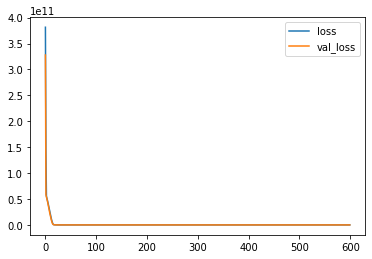

In [200]:
pd.DataFrame (model.history.history).plot()


In [203]:
# evaluation 
predict = model.predict ( X_test )
predict = pd.Series (predict.reshape (6464 , ))
real = pd.Series (y_test)
real = real.reset_index() ['price']
loss_fc = pd.concat ( [ predict , real ]  , axis = 1)


loss_fc = loss_fc.rename ( columns = { 0 : 'predict' } )

from sklearn.metrics import mean_absolute_error, mean_squared_error , explained_variance_score




print (mean_absolute_error  (loss_fc.predict , loss_fc.price))
# print (mean_squared_error (loss_fc.predict , loss_fc.price))
print (explained_variance_score (loss_fc.predict , loss_fc.price))

print (df_new.price.mean())

4.248709197091584 * 100 / 532570.5512856215

4.248709197091584
0.9999999975205889
532570.5512856215


0.0007977739638129127

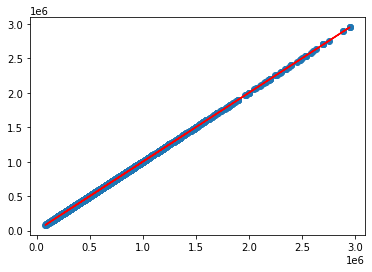

In [204]:
plt.scatter ( loss_fc.predict , loss_fc.price ,  )
plt.plot ( loss_fc.price , loss_fc.price , 'r'  )